# Import libs

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set()

# Load dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content
!ls

/content
drive  sample_data


In [5]:
!git clone https://github.com/naumovskiy/alex-repo.git

Cloning into 'alex-repo'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 192 (delta 6), reused 0 (delta 0), pack-reused 172
Receiving objects: 100% (192/192), 68.90 MiB | 32.41 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [6]:
%cd /content/alex-repo/
!git pull

/content/alex-repo
Already up to date.


In [7]:
df = pd.read_csv('/content/alex-repo/yandex_task/spoiled_data.csv', delimiter=',',header=0)

In [8]:
df.columns = ['idx']+ ['f'+str(i) for i in np.arange(0,11)]
df = df.set_index('idx')

In [9]:
df.head(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
idx,,,,,,,,,,,
0,0.655968525404552,2.0,6.0,-0.032833673646417205,-4.062045264897834,12.064858107915615,-4.632454,-1.0,4.0,1.0,0
1,10.199211979664126,1.0,2.0,1.351357995650444,-3.5717621073746653,9.89244646012535,-1.005013,1.0,1.0,2.0,0
2,0.007215371684138306,1.0,10.0,-1.4884445239973123,-3.9464790108710197,10.513220799618184,-8.979408,0.0,3.0,3.0,0
3,0.25743120934008346,1.0,9.0,-1.5231538101794566,-4.4502335354549425,11.798010557567801,-6.217044,0.0,6.0,4.0,0
4,2.871536319644719,2.0,4.0,-0.5324727856834761,-3.4844525300735434,12.500063315341055,-3.503076,-1.0,15.0,5.0,0


# Set precision like dataset

In [11]:
pd.set_option('precision', 15)

OptionError: ignored

# Split data by FULL and NODATA

## nodata

In [14]:
df_nodata = df[(df.f10 == 8)]

In [15]:
df_nodata.head(3)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
idx,,,,,,,,,,,
1585,-,-,5.0,0.17723993863393606,-,9.90018886549262,-3.803903,-1.0,0.0,1.0,8
1586,0.04667945495505864,-,10.0,-,-,-,-8.715818,0.0,0.0,2.0,8
1587,-,2.0,5.0,-1.1260640196914773,-3.67909491943822,-,-3.687618,-1.0,4.0,3.0,8


In [16]:
df_nodata.shape

(400, 11)

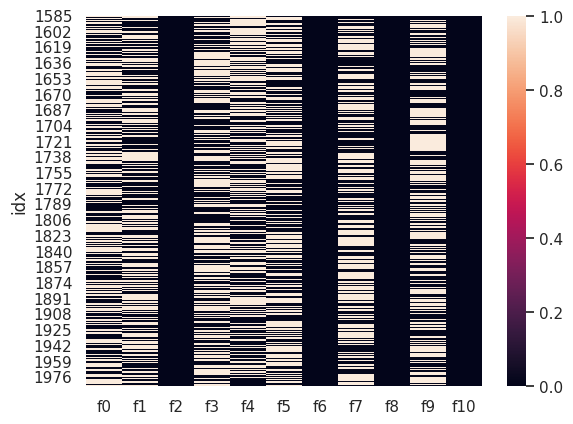

In [17]:
sns.heatmap(df_nodata.replace('-',np.nan).isnull());

In [18]:
pd.DataFrame(df_nodata.replace('-',np.nan).isnull().sum()).T

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,199,198,0,202,190,199,0,215,0,210,0


## full

In [19]:
df_full = df[~(df.f10 == 8)]
df_full.head(3)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
idx,,,,,,,,,,,
0,0.655968525404552,2.0,6.0,-0.032833673646417205,-4.062045264897834,12.064858107915615,-4.632454,-1.0,4.0,1.0,0
1,10.199211979664126,1.0,2.0,1.351357995650444,-3.5717621073746653,9.89244646012535,-1.005013,1.0,1.0,2.0,0
2,0.007215371684138306,1.0,10.0,-1.4884445239973123,-3.9464790108710197,10.513220799618184,-8.979408,0.0,3.0,3.0,0


In [20]:
sum(df_full.isnull().sum())

0

In [21]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 0 to 1584
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      1585 non-null   object 
 1   f1      1585 non-null   object 
 2   f2      1585 non-null   float64
 3   f3      1585 non-null   object 
 4   f4      1585 non-null   object 
 5   f5      1585 non-null   object 
 6   f6      1585 non-null   float64
 7   f7      1585 non-null   object 
 8   f8      1585 non-null   float64
 9   f9      1585 non-null   object 
 10  f10     1585 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 148.6+ KB


### convert object columns to float

In [22]:
for col in df_full.columns:
    if df_full.loc[:,col].dtypes == np.object:
        df_full.loc[:,col] = df_full[col].astype(float)

<ipython-input-22-e2215c0deb03>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df_full.loc[:,col].dtypes == np.object:
<ipython-input-22-e2215c0deb03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full.loc[:,col] = df_full[col].astype(float)
<ipython-input-22-e2215c0deb03>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

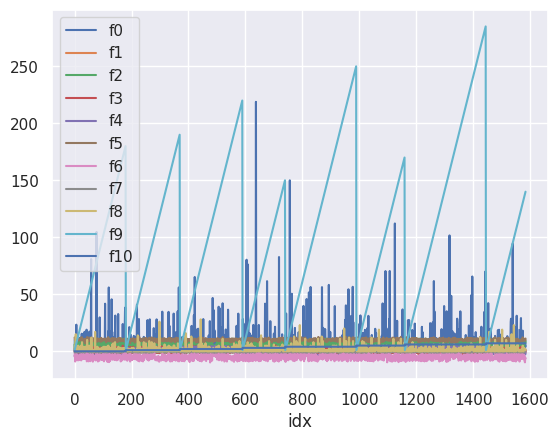

In [23]:
df_full.plot();

# ANALYSE FULL DATA

f0,	f1,	f3,	f4,	f5,	f7,	f9


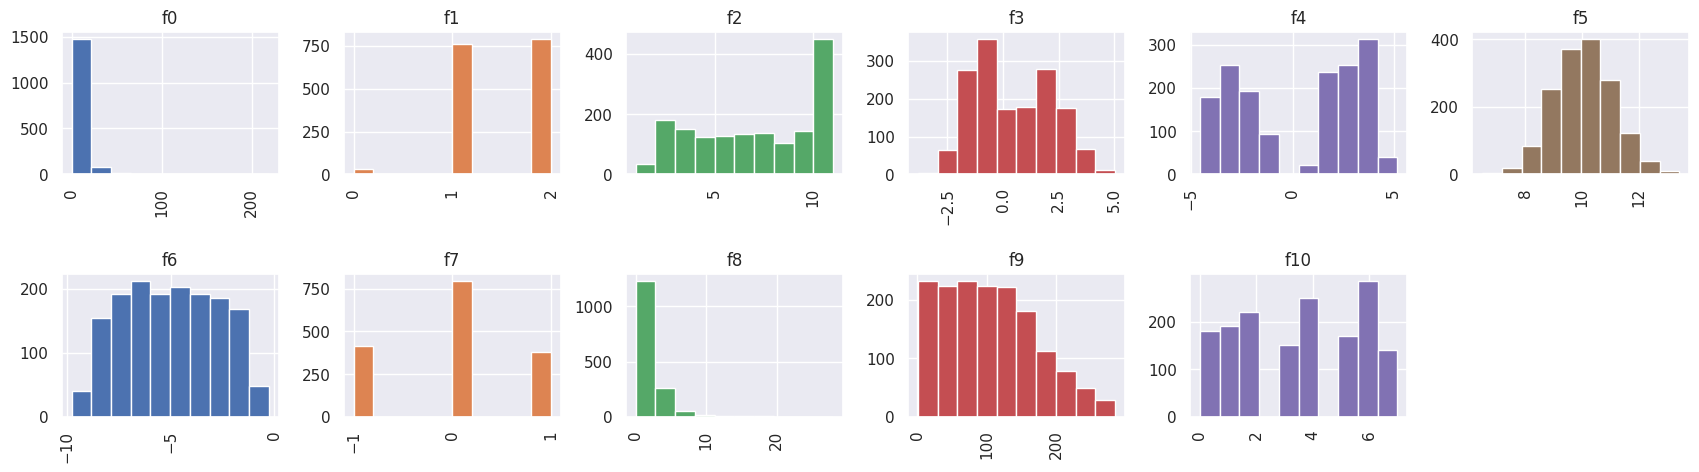

In [30]:
df_visual = df_full
fig = plt.figure(figsize=(21,5))
cols = 6
rows = np.int32(np.ceil(float(df_visual.shape[1])/cols))
for i, name_col in enumerate(df_visual.columns):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.set_title(name_col)
    df_visual[name_col].hist(ax=ax,color='C'+str(i%cols))
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.3)
del df_visual

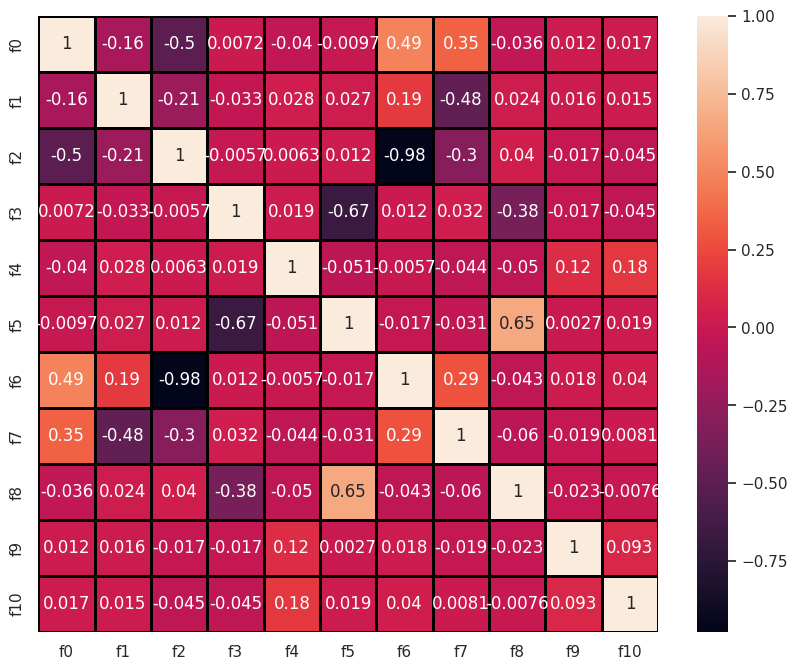

In [31]:
f, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(df_full.corr(),annot=True,ax=ax,linecolor='black',linewidths=1);

In [32]:
df_full.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
count,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,5.643345,1.478233,6.603785,0.410871,0.268186,10.048040,-5.003978,-0.023344,1.745110,105.113565,3.545741
std,13.155302,0.540937,3.082328,1.742784,2.988562,1.036267,2.274904,0.706274,2.639902,66.644597,2.227998
min,0.005300,0.000000,1.000000,-3.829487,-4.567474,6.470850,-9.793060,-1.000000,0.000000,1.000000,0.000000
25%,0.211525,1.000000,4.000000,-1.073876,-2.807200,9.318129,-6.855916,-1.000000,0.000000,50.000000,2.000000
50%,1.028624,1.000000,7.000000,0.101233,1.580736,10.042337,-5.003344,0.000000,1.000000,100.000000,4.000000
75%,5.044527,2.000000,10.000000,1.958772,3.087668,10.747578,-3.101167,0.000000,2.000000,150.000000,6.000000
max,218.836397,2.000000,11.000000,5.029878,5.168252,13.415400,-0.261338,1.000000,28.000000,285.000000,7.000000


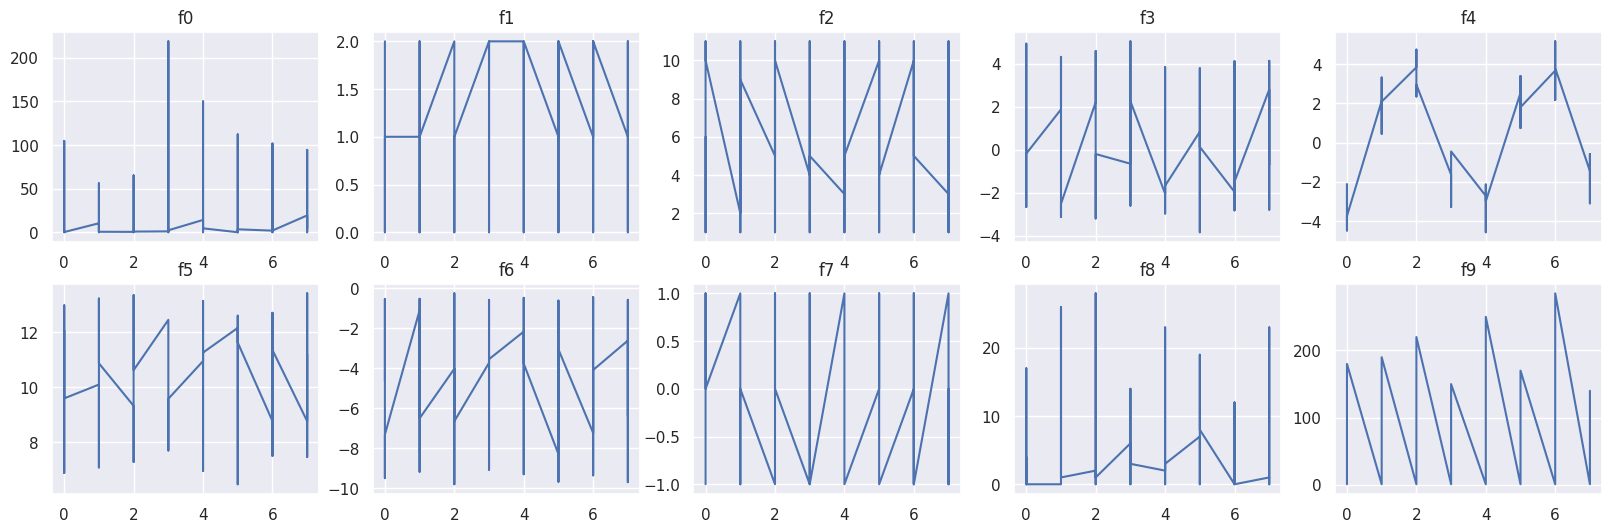

In [33]:
f, axes = plt.subplots(2,5,figsize=(20,6))
for i in np.arange(0,10):
    axes[i//5][i%5].plot(df_full.f10,df_full.iloc[:,i])
    axes[i//5][i%5].set_title('f'+str(i))

<ipython-input-43-7ec97f014d84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_full.iloc[:,i],ax=axes[i//5][i%5])
<ipython-input-43-7ec97f014d84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_full.iloc[:,i],ax=axes[i//5][i%5])
<ipython-input-43-7ec97f014d84>:3: UserWarning: 

`distplo

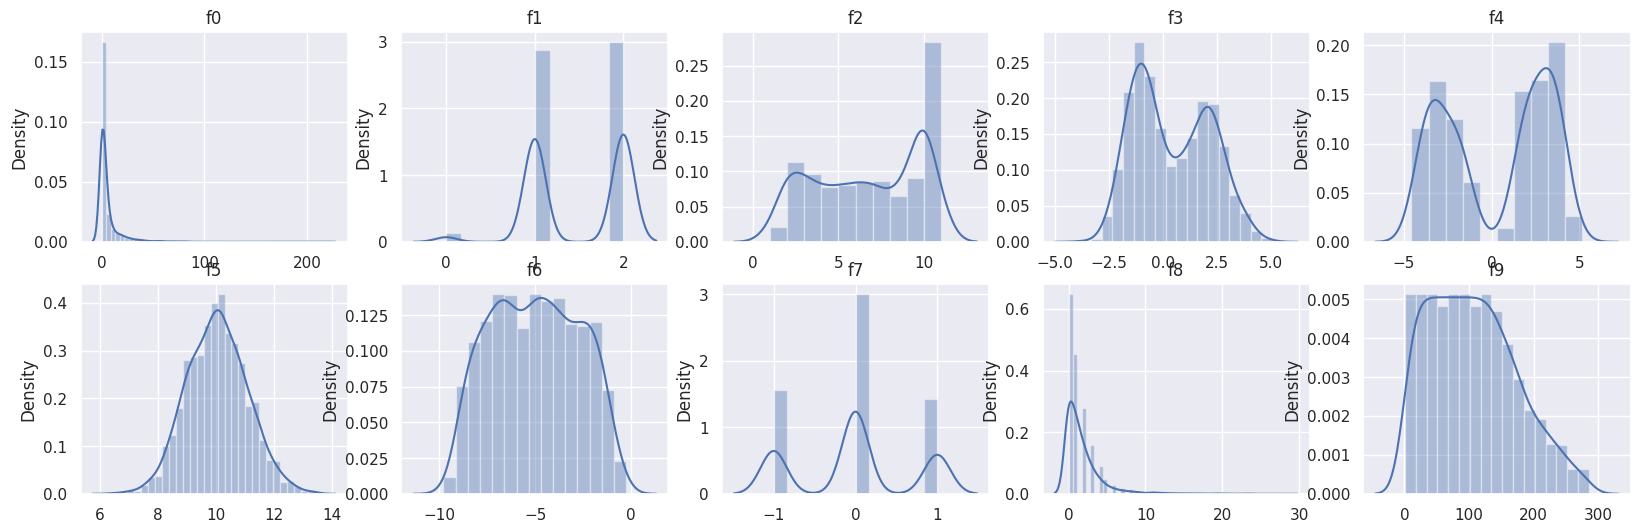

In [43]:
f, axes = plt.subplots(2,5,figsize=(20,6))
for i in np.arange(0,10):
    sns.distplot(df_full.iloc[:,i],ax=axes[i//5][i%5])
    axes[i//5][i%5].set(title='f'+str(i))
    axes[i//5][i%5].set_xlabel('')

# SHUFFLE and CUT 400 rows

In [35]:
df_full_shuffle = df_full.sample(frac=1)
df_full_shuffle = df_full_shuffle[:400]

In [36]:
f4_additional = df_full[df_full.f10.isin([0,4])].f4.values[:400]

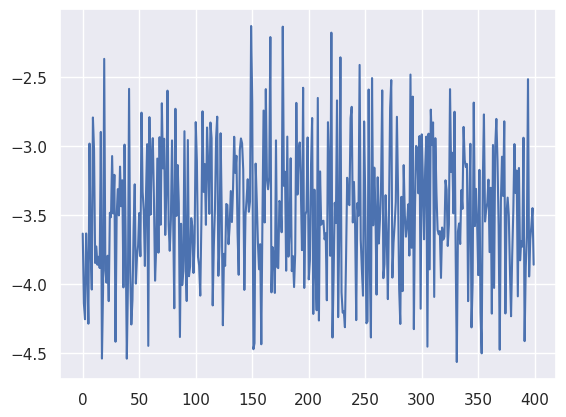

In [37]:
np.random.shuffle(f4_additional)
plt.plot(f4_additional)

# SVOD

In [38]:
pd.options.mode.chained_assignment =None

In [39]:
for col in ['f0','f1','f3','f5','f7','f9']:
    cur_cnt = df_nodata[df_nodata[col]=='-'].shape[0]
    df_nodata.loc[(df_nodata[col]=='-'),col] = df_full_shuffle.iloc[:cur_cnt][col].values

In [40]:
df_nodata.loc[:,['f0','f1','f3','f5','f7','f9']] = df_full_shuffle.loc[:,['f0','f1','f3','f5','f7','f9']].values
df_nodata['f4'] = f4_additional
df_nodata['f10'] = 8
df_nodata['f9'] = np.arange(1,df_nodata.shape[0]+1)

<ipython-input-40-4d32a7d47335>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_nodata.loc[:,['f0','f1','f3','f5','f7','f9']] = df_full_shuffle.loc[:,['f0','f1','f3','f5','f7','f9']].values


In [ ]:
# f0_8 = np.random.normal(5.643345385649176, 13.155301723301079,400)
# f1_8 = np.random.choice([2,1,0],size=400,replace=True,p=[0.5,0.48,0.02])

# f5_8 = np.random.normal(10.048040395387741, 1.036267074010031	,400)
# f7_8 = np.random.choice([0,-1,1],size=400,replace=True,p=[0.5,0.26,0.24])

# df_nodata['f0'] = f0_8
# df_nodata['f1'] = f1_8
# df_nodata['f5'] = f5_8
# df_nodata['f7'] = f7_8

In [41]:
df_nodata.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
idx,,,,,,,,,,,
1585,4.901088,2.0,5.0,2.168124,-3.635545,9.826395,-3.803903,-1.0,0.0,1,8
1586,27.105324,2.0,10.0,-0.544199,-4.140708,10.827225,-8.715818,1.0,0.0,2,8
1587,1.114299,2.0,5.0,2.091500,-4.256954,9.338574,-3.687618,-1.0,4.0,3,8
1588,0.114503,1.0,7.0,1.384799,-3.634500,8.403582,-4.917433,0.0,0.0,4,8
1589,1.583799,2.0,10.0,1.151427,-3.892064,9.476558,-8.857871,-1.0,5.0,5,8
1590,17.339752,2.0,7.0,-0.565953,-4.289317,10.633276,-5.243750,1.0,0.0,6,8
1591,3.434845,1.0,10.0,0.557905,-2.982096,9.874681,-8.622316,1.0,3.0,7,8
1592,0.107845,2.0,7.0,1.926921,-3.755691,9.293680,-5.329994,0.0,0.0,8,8
1593,1.462085,2.0,5.0,1.447561,-4.041527,8.413836,-3.801392,-1.0,1.0,9,8


<ipython-input-42-8fdc74ab6d8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_nodata.iloc[:,i],ax=axes[i//5][i%5])
<ipython-input-42-8fdc74ab6d8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_nodata.iloc[:,i],ax=axes[i//5][i%5])
<ipython-input-42-8fdc74ab6d8a>:3: UserWarning: 

`dis

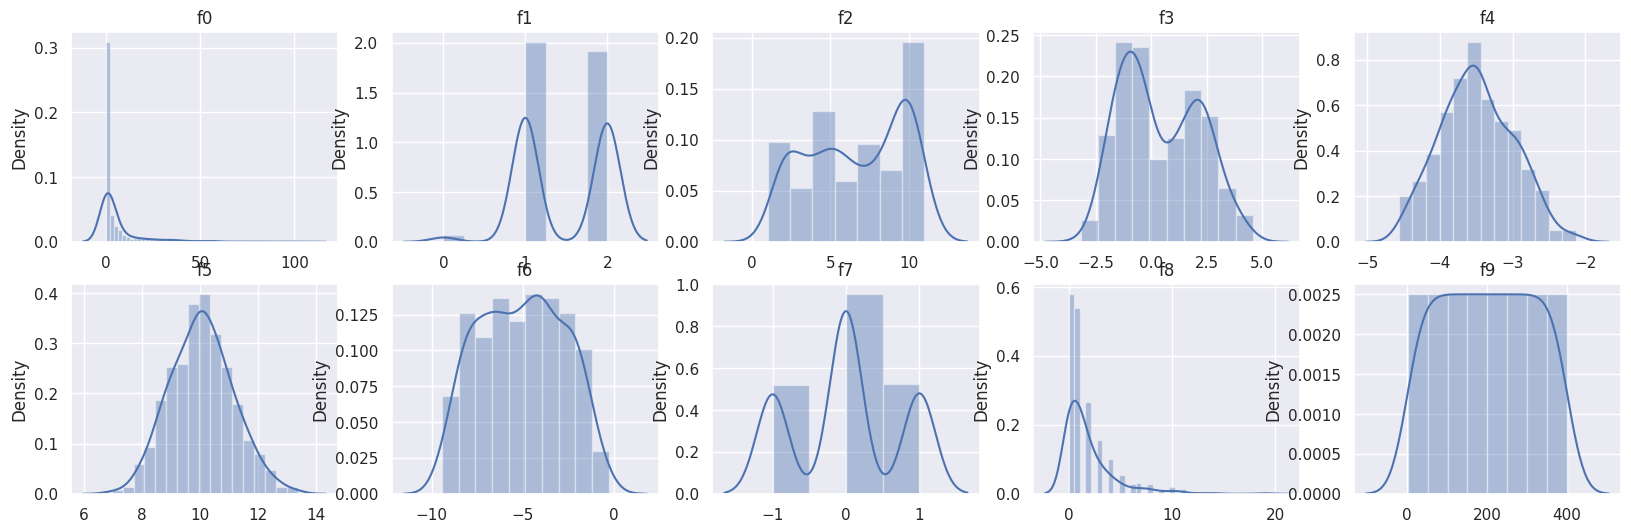

In [42]:
f, axes = plt.subplots(2,5,figsize=(20,6))
for i in np.arange(0,10):
    sns.distplot(df_nodata.iloc[:,i],ax=axes[i//5][i%5])
    axes[i//5][i%5].set(title='f'+str(i))
    axes[i//5][i%5].set_xlabel('')

# MERGE

In [44]:
df_final = pd.concat([df_full,df_nodata])
df_final.sample(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
idx,,,,,,,,,,,
887,0.026234,1.0,11.0,-0.420323,-3.450018,11.121169,-8.667853,0.0,1.0,148.0,4
5,0.031705,1.0,10.0,-0.287951,-3.156776,10.440380,-7.649405,0.0,1.0,6.0,0
1699,1.499246,2.0,2.0,-1.181130,-2.943280,10.103775,-2.301816,-1.0,1.0,115.0,8
1840,19.832592,1.0,4.0,3.039551,-4.389421,9.928125,-3.124518,1.0,0.0,256.0,8
255,0.196496,1.0,10.0,-1.574511,1.879609,9.987169,-7.201241,0.0,1.0,76.0,1
645,0.451485,1.0,10.0,2.706296,-1.306379,8.784186,-6.606439,0.0,0.0,56.0,3
745,1.096667,2.0,6.0,-1.441631,-4.111034,10.667787,-4.791425,-1.0,0.0,6.0,4
216,12.924068,1.0,2.0,0.474076,2.254817,9.452167,-2.148509,1.0,1.0,37.0,1
1802,7.182587,2.0,11.0,-2.229489,-2.826785,11.869568,-7.904668,1.0,0.0,218.0,8


# PREDICT


In [45]:
from sklearn.linear_model import LogisticRegression


def dummy_transform(data):
    """
    Replaces all categorical features in the dataset with dummies
    in a very naive way
    """
    transformed_data = np.zeros((data.shape[0], 23))
    transformed_data[:, 0] = data[:, 0]
    transformed_data[:, 1:4] = pd.get_dummies(data[:, 1]).values
    transformed_data[:, 4:15] = pd.get_dummies(data[:, 2]).values
    transformed_data[:, 15:19] = data[:, 3:7]
    transformed_data[:, 19:22] = pd.get_dummies(data[:, 7]).values
    transformed_data[:, 22:23] = data[:, 8:9]
    return transformed_data


class CustomClassifier(LogisticRegression):
    """
    Custom Logistic Regression implementation with preset coefficients
    """

    def __init__(self):

        super(CustomClassifier, self).__init__()
        self.coef_ = np.array([[
            -0.21404096, -2.33748762, -2.70184235, -2.73066579, -1.54875568,
            -2.06471249, -1.00291385, -1.43804488, -1.63824906, -1.0017922,
            -0.48928441, -0.62414559, -0.27359805,  0.98648587,  1.32501456,
            -0.80052908, -0.283991,  1.34641143,  0.02758078, -2.6099112,
            -1.63476157, -3.525323,  0.60030625
        ]])
        self.intercept_ = np.array([-7.76999576])
        self.classes_ = np.array([0, 1])

    def predict(self, X):
        assert len(X.shape) == 2, 'Invalid tensor shape'
        if X.shape[1] == 23:
            return super().predict(X)
        else:
            return super().predict(dummy_transform(X))

clf = CustomClassifier()


In [46]:
y_predict = clf.predict(np.array(df_final))

In [47]:
df_y = pd.read_csv('/content/alex-repo/yandex_task/clean_data_with_target.csv', delimiter=',',header=0)

In [48]:
df_y['y']

0       1
1       0
2       1
3       1
4       1
       ..
1980    0
1981    1
1982    0
1983    1
1984    0
Name: y, Length: 1985, dtype: int64

In [49]:
metrics.accuracy_score(df_y['y'], y_predict)

0.854911838790932

In [50]:
print(metrics.classification_report(df_y['y'], y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1016
           1       0.85      0.85      0.85       969

    accuracy                           0.85      1985
   macro avg       0.85      0.85      0.85      1985
weighted avg       0.85      0.85      0.85      1985

